In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
w = [5,10,20,30,50,70,80,100,150,200,250,300,400,450]
ps = [22,30,40,50,70,88,96,115,165,212,260,310,410,460]
pb = [25,30,38,50,70,90,100,120,165,215,260,310,410,460]
pp = []
for i in range(0,len(w)):
    pp.append((ps[i]+pb[i])/2)

In [3]:
import pandas as pd
table = {'W(lb)': w,
         'Presión de subida (psi)': ps,
         'Presión de bajada (psi)': pb,
         'Presión promedio (psi)': pp}
df = pd.DataFrame.from_dict(table)

In [4]:
df

,W(lb),Presión de subida (psi),Presión de bajada (psi),Presión promedio (psi)
0,5,22,25,23.5
1,10,30,30,30.0
2,20,40,38,39.0
3,30,50,50,50.0
4,50,70,70,70.0
5,70,88,90,89.0
6,80,96,100,98.0
7,100,115,120,117.5
8,150,165,165,165.0
9,200,212,215,213.5


In [5]:
pr = []
for i in range(0,len(ps)):
    pr.append(4*w[i]/math.pi)
pr

[6.366197723675814,
 12.732395447351628,
 25.464790894703256,
 38.197186342054884,
 63.66197723675813,
 89.12676813146139,
 101.85916357881302,
 127.32395447351627,
 190.9859317102744,
 254.64790894703253,
 318.3098861837907,
 381.9718634205488,
 509.29581789406507,
 572.9577951308232]

In [6]:
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
npp = np.asarray(pp)
npr = np.asarray(pr)
nnpr = []
ajli = np.polyfit(pp,pr,1)
for i in range(len(pp)):
    nnpr.append(npp[i]*ajli[0]+ajli[1])

In [7]:
ajli

array([  1.30807148, -25.86423622])

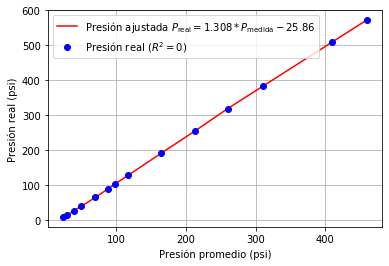

In [17]:
plt.ylabel('Presión real (psi)')
plt.xlabel('Presión promedio (psi)')
plt.plot(pp,npr,'-r')
plt.plot(pp,pr,'ob')
plt.grid()
plt.legend((r'Presión ajustada $P_{\mathrm{real}} = 1.308*P_{\mathrm{medida}} - 25.86$',r'Presión real $(R^{2} = 0)$'))
plt.savefig('presiones.pdf')

In [15]:
err = []
r2 = 0
for i in range(0,len(pr)):
    r2 = r2+((pr[i]-npr[i])**2)
    err.append(100*abs(pr[i]-pp[i])/max(pr[i],pp[i]))

In [16]:
r2

0.0

In [10]:
err

[72.90979692052845,
 57.55868184216124,
 34.70566437255575,
 23.60562731589023,
 9.054318233202666,
 0.14223351089585948,
 3.7887249838125916,
 7.715715800799822,
 13.606202026280684,
 16.158746057322393,
 18.318591006665383,
 18.842189782263674,
 19.496688251761547,
 19.714854408260845]

In [11]:
table = {'Presión promedio (psi)': pp,
         'Presión real (psi)': pr,
         'Error (%)': err}
df = pd.DataFrame.from_dict(table)
df

,Presión promedio (psi),Presión real (psi),Error (%)
0,23.5,6.366198,72.909797
1,30.0,12.732395,57.558682
2,39.0,25.464791,34.705664
3,50.0,38.197186,23.605627
4,70.0,63.661977,9.054318
5,89.0,89.126768,0.142234
6,98.0,101.859164,3.788725
7,117.5,127.323954,7.715716
8,165.0,190.985932,13.606202
9,213.5,254.647909,16.158746
